# Saving profiles to netcdf
(for ease of processing strain rates)

This notebook just holds the commands of calculating profiles (using determined settings from the other notebooks in this folder), plotting them, and saving them.

## Setup

In [1]:
# Load libraries
import sys
import sys
import pickle
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    20:06:02 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    20:06:02 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    20:06:02 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [2]:
# Load data
ds_11 = reload("A101")
ds_11 = ds_11.isel(time=range(20,len(ds_11.time))) # trim first few bursts, which were tests
ds_11_w = reload_winter("A101")
ds_11_s = reload_summer("A101")

ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests
ds_13_w = reload_winter("A103")
ds_13_s = reload_summer("A103")
ds_13_s = ds_13_s.isel(time=range(100,len(ds_13_s.time)))

ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests
ds_14_w = reload_winter("A104")
ds_14_s = reload_summer("A104")


In [3]:
# open client
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41379")
client

<Client: 'tcp://127.0.0.1:41379' processes=4 threads=16, memory=125.81 GiB>

## A11 Summer 2022

In [4]:
s22 = custom_profile(ds_11.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)


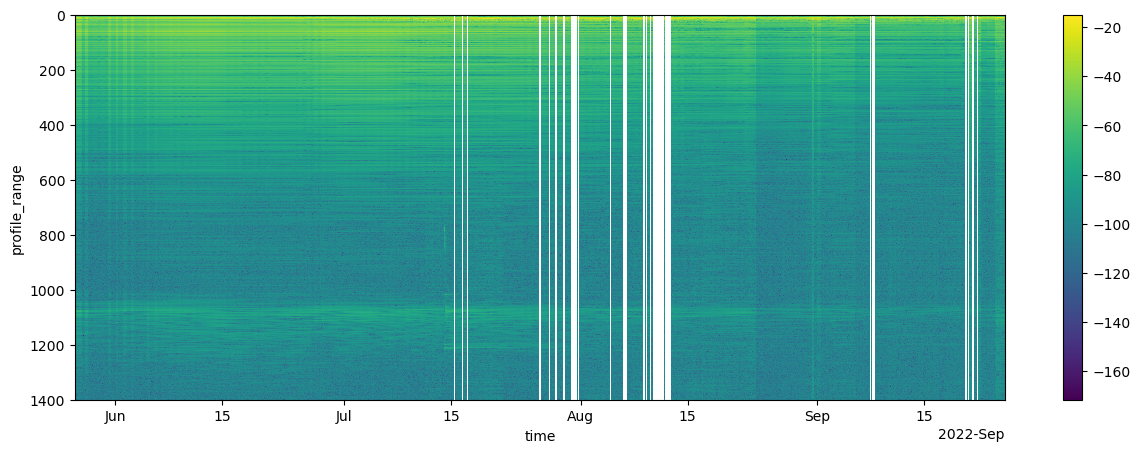

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(s22).plot(x='time')
ax.invert_yaxis()


In [6]:
s22.nbytes/1e9

0.623348592

In [7]:
with open('A11_22S.pickle', 'wb') as handle:
    pickle.dump(s22, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# Code to open
#with open('A11_22S.pickle', 'rb') as handle:
#    b = pickle.load(handle)

## A11 Winter

In [9]:
winter = custom_profile(ds_11_w.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=200)


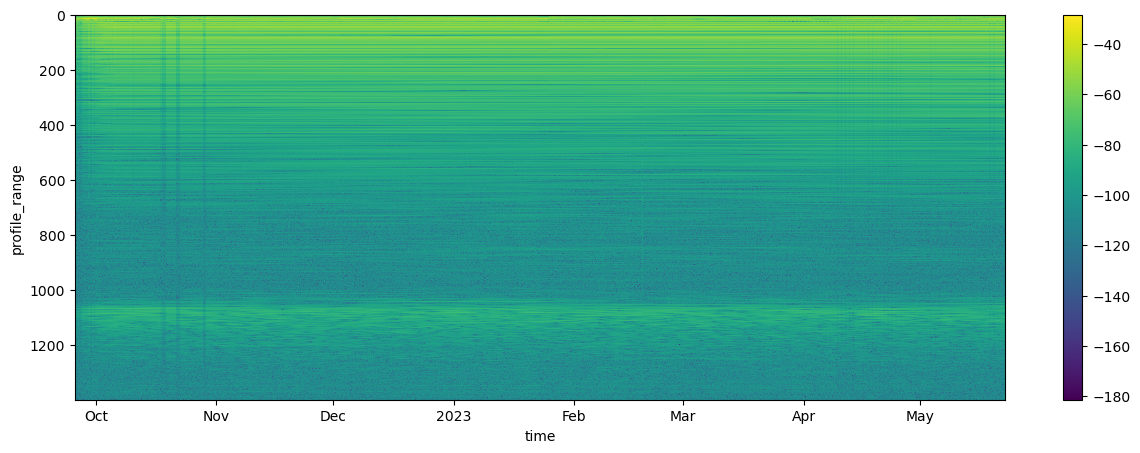

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(winter).plot(x='time')
ax.invert_yaxis()


In [11]:
winter.nbytes/1e9

2.432968704

In [12]:
with open('A11_22W.pickle', 'wb') as handle:
    pickle.dump(winter, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A13 Summer 2022

In [13]:
s22 = custom_profile(ds_13.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=30000)

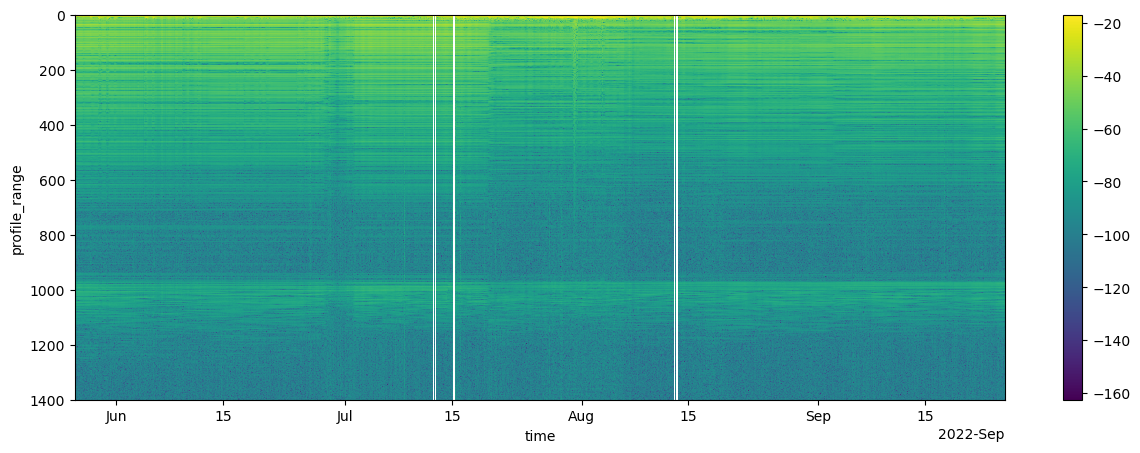

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(s22).plot(x='time')
ax.invert_yaxis()


In [15]:
s22.nbytes/1e9

0.31176792

In [16]:
with open('A13_22S.pickle', 'wb') as handle:
    pickle.dump(s22, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A13 Winter

In [17]:
winter = custom_profile(ds_13_w.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=8000)

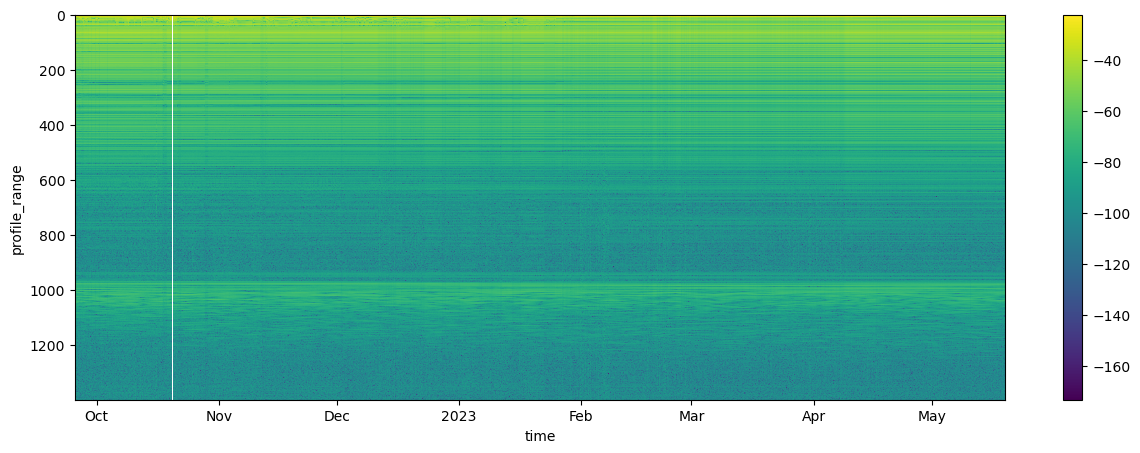

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(winter).plot(x='time')
ax.invert_yaxis()


In [19]:
winter.nbytes/1e9

1.931335424

In [20]:
with open('A13_22W.pickle', 'wb') as handle:
    pickle.dump(winter, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A13 Summer 2023

In [21]:
s23 = custom_profile(ds_13_s.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=20000)

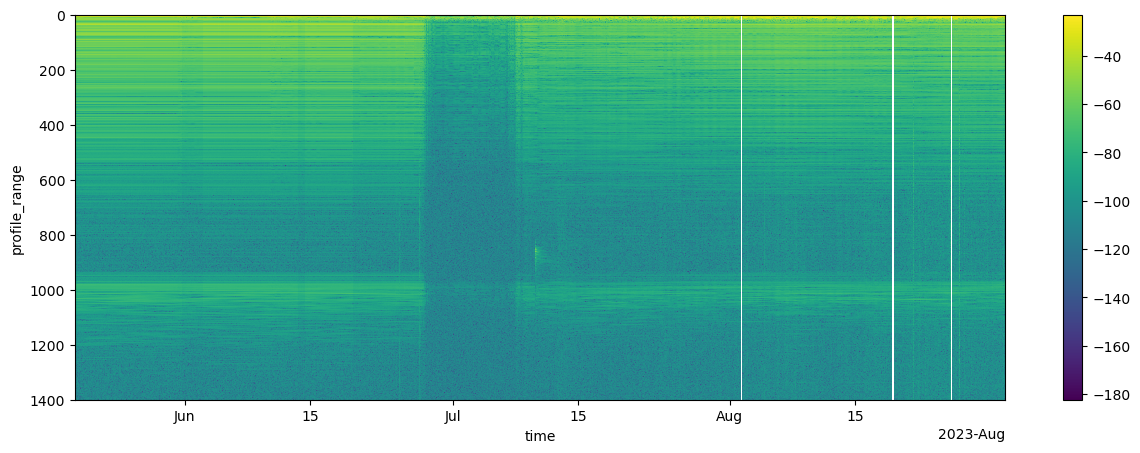

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(s23).plot(x='time')
ax.invert_yaxis()


In [23]:
s23.nbytes/1e9

2.5180556

In [24]:
with open('A13_23S.pickle', 'wb') as handle:
    pickle.dump(s23, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A14 Summer 2022

In [25]:
s22 = custom_profile(ds_14.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=4000)

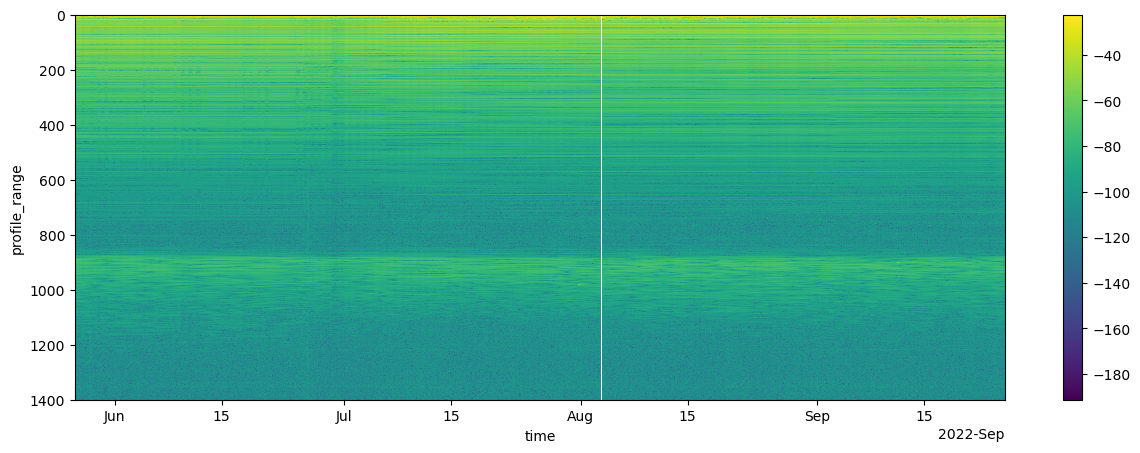

In [26]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(s22).plot(x='time')
ax.invert_yaxis()


In [27]:
s22.nbytes/1e9

1.120839552

In [28]:
with open('A14_22S.pickle', 'wb') as handle:
    pickle.dump(s22, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A14 Winter

In [29]:
winter = custom_profile(ds_14_w.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=200)

In [30]:
dts = ((winter.time.values[1:] - winter.time.values[0:-1])/1e9).astype('float64')
dts1 = np.append(dts,0)
dts2 = np.insert(dts,0,0)

In [31]:
mask1 = np.tile(dts1,(6624,1)).T
mask2 = np.tile(dts2,(6624,1)).T


In [32]:
test = winter.where(mask1 < 1800).where(mask2<1800)

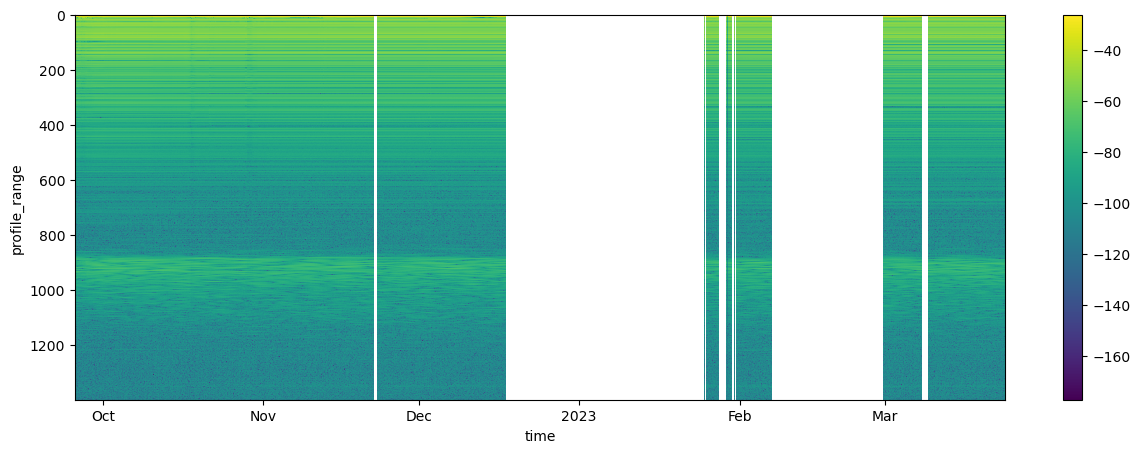

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(test).plot(x='time')
ax.invert_yaxis()


In [34]:
test.nbytes/1e9

1.187126784

In [35]:
with open('A14_22W.pickle', 'wb') as handle:
    pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL)

## A14 Summer 2023

In [36]:
s23 = custom_profile(ds_14_s.isel(attenuator_setting_pair=0).chirp,clip_threshold=1.2,min_chirps = 5,start=8000)

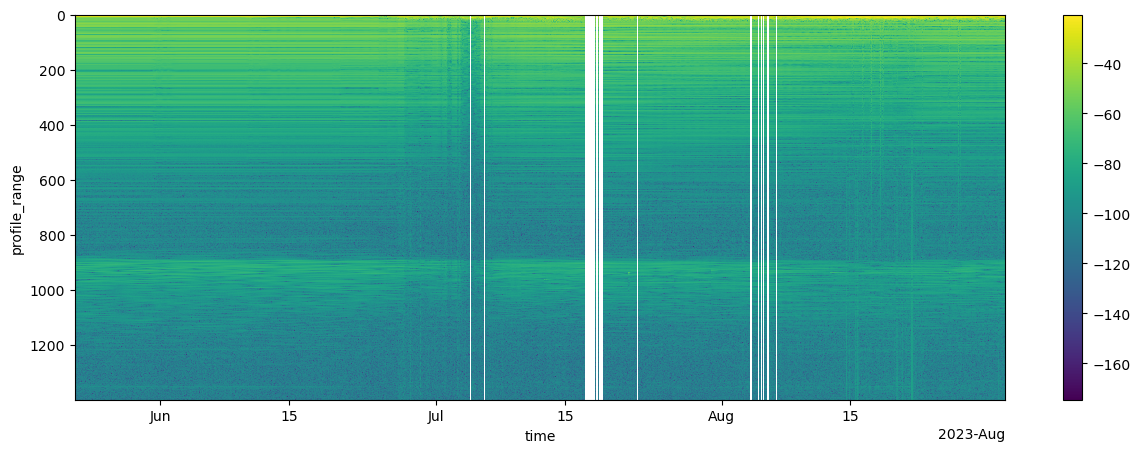

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(s23).plot(x='time')
ax.invert_yaxis()


In [38]:
s23.nbytes/1e9

0.82702128

In [39]:
with open('A14_23S.pickle', 'wb') as handle:
    pickle.dump(s23, handle, protocol=pickle.HIGHEST_PROTOCOL)